In [1]:
import PyOctaveBand
import numpy as np
import matplotlib.pyplot as plt
from acoustics.signal import third_octaves
from acoustics.standards.iec_61672_1_2013 import NOMINAL_THIRD_OCTAVE_CENTER_FREQUENCIES
from hos import HOS

In [3]:
# Sample rate and duration
fs = 1024*10
duration = 5

In [4]:
# Time array
x = np.arange(np.round(fs * duration)) / fs

In [5]:
def signal(x):
    # Signal with 6 frequencies
    f1, f2, f3, f4, f5, f6 = 20, 100, 500, 2000, 4000, 15000
    # Multi Sine wave signal
    return 100 \
        * (np.sin(2 * np.pi * f1 * x)
           + np.sin(2 * np.pi * f2 * x)
           + np.sin(2 * np.pi * f3 * x)
           + np.sin(2 * np.pi * f4 * x)
           + np.sin(2 * np.pi * f5 * x)
           + np.sin(2 * np.pi * f6 * x))

/u/f/fandreuz/.local/lib/python3.6/site-packages/acoustics/signal.py:828: RuntimeWarning: divide by zero encountered in log10
  level = 10.0 * np.log10(power / ref**2.0)


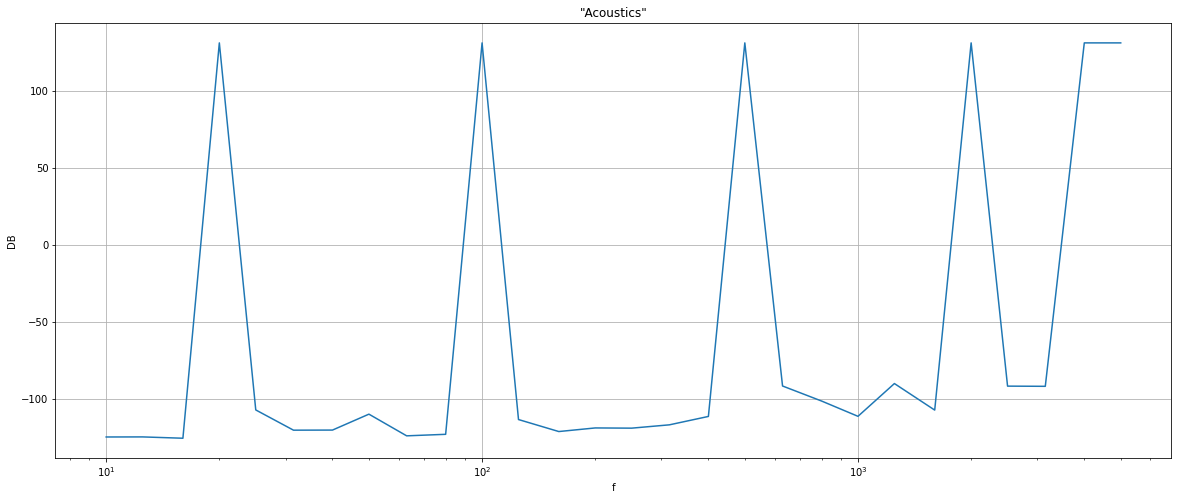

In [6]:
y = signal(x)

# Filter (only octave spectra)
a,b = third_octaves(y, fs)

plt.figure(figsize=(20,8))
plt.plot(NOMINAL_THIRD_OCTAVE_CENTER_FREQUENCIES, b)
plt.xscale('log')

plt.grid()
plt.ylabel('DB')
plt.xlabel('f')
plt.title('"Acoustics"')

plt.show()